In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
df=df.drop('Unnamed: 0', axis=1)

In [4]:
df.shape

(200, 4)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.duplicated().sum()

0

<function matplotlib.pyplot.show(close=None, block=None)>

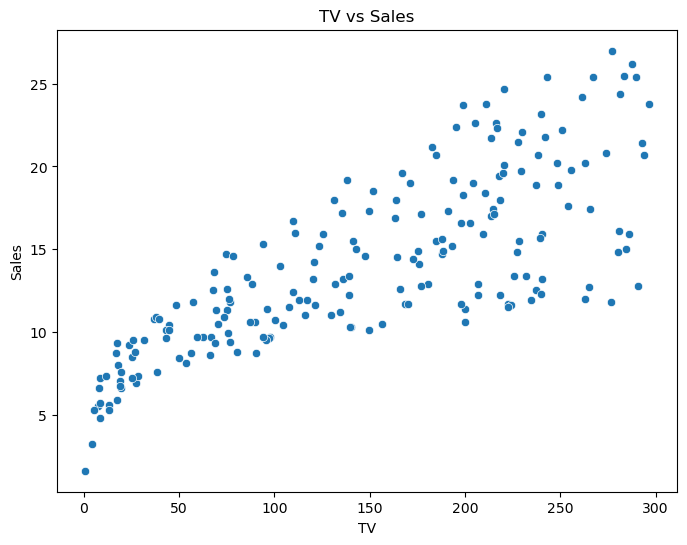

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='TV', y='Sales')
plt.title('TV vs Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

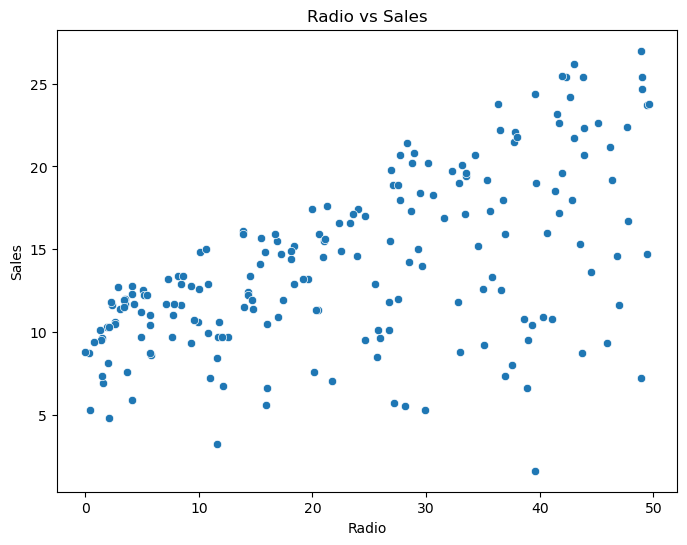

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='Radio', y='Sales')
plt.title('Radio vs Sales')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

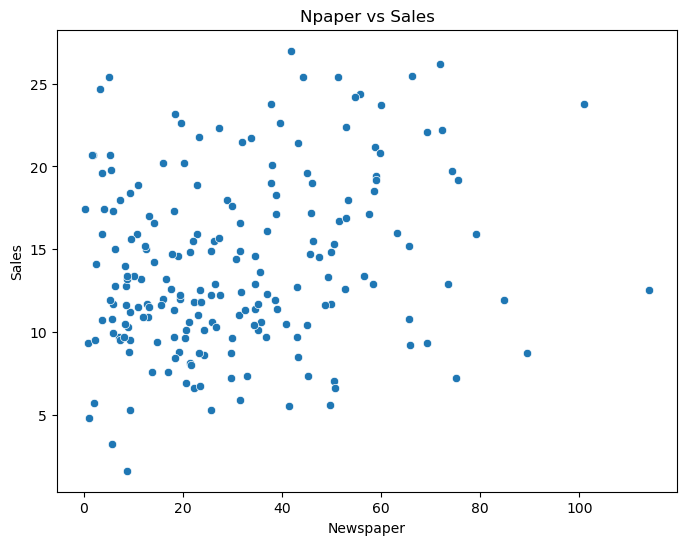

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(df, x='Newspaper', y='Sales')
plt.title('Npaper vs Sales')
plt.show

In [12]:
def distplots(col):
    sns.distplot(df[col])
    plt.show()

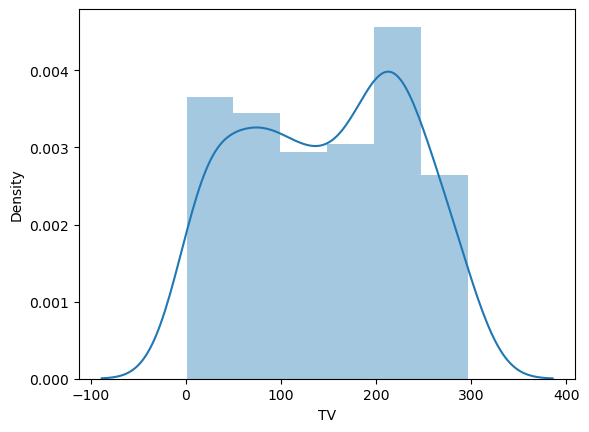

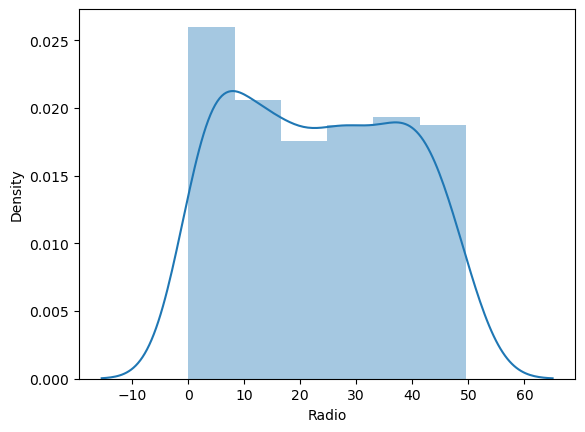

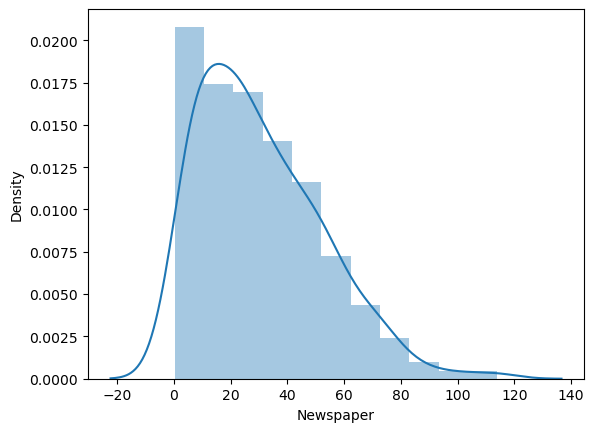

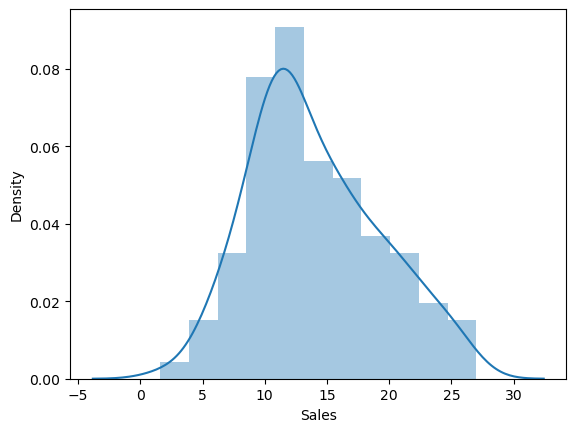

In [13]:
for i in list(df.select_dtypes(exclude=['object']).columns):
    distplots(i)

In [14]:
x=df.drop('Sales', axis=1)
y=df['Sales']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=2)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score

In [17]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [18]:
yhat_train = lreg.predict(x_train)
yhat_test = lreg.predict(x_test)

In [19]:
train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)
train_r2 = r2_score(y_train, yhat_train)
test_r2 = r2_score(y_test, yhat_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 2.4692052921817464
Testing MSE: 4.503125945046124
Training R2 Score: 0.9151707412454462
Testing R2 Score: 0.757589450077272


In [20]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train, y_train)

RandomForestRegressor()

In [21]:
yhat_train=rfc.predict(x_train)
yhat_test=rfc.predict(x_test)

In [22]:
train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)
train_r2 = r2_score(y_train, yhat_train)
test_r2 = r2_score(y_test, yhat_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0778363249999996
Testing MSE: 0.4706066749999982
Training R2 Score: 0.9973259421665607
Testing R2 Score: 0.9746664818447827


In [23]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor()

In [24]:
yhat_train=tree.predict(x_train)
yhat_test=tree.predict(x_test)

In [25]:
train_mse = mean_squared_error(y_train, yhat_train)
test_mse = mean_squared_error(y_test, yhat_test)
train_r2 = r2_score(y_train, yhat_train)
test_r2 = r2_score(y_test, yhat_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0
Testing MSE: 0.6745000000000001
Training R2 Score: 1.0
Testing R2 Score: 0.9636905745212939


In [26]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    yhat_train = model.predict(x_train)
    yhat_test = model.predict(x_test)
    train_mse = mean_squared_error(y_train, yhat_train)
    test_mse = mean_squared_error(y_test, yhat_test)
    train_r2 = r2_score(y_train, yhat_train)
    test_r2 = r2_score(y_test, yhat_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,2.469205,4.503126,0.915171,0.757589
1,Random Forest,0.071005,0.528018,0.997561,0.971576
2,Decision Tree,0.000000,0.686500,1.000000,0.963045


THE BEST MODEL IS RANDOM FOREST REGRESSOR WITH AN R2 SCORE OF 97%